In [219]:
#Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

Real World Datasets

In [220]:
# Import the required CSV files
vaccination_data = pd.read_csv(r"C:\Users\aoife\OneDrive\Documents\vaccine-data .csv", index_col = "COUNTRY")
vaccination_data

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
COUNTRY,,,,,,,,,,,
Afghanistan,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567,43.0,38,14076220,36,11.0
Albania,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760,107.0,47,1277204,45,5.0
Algeria,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131,35.0,18,6481186,15,4.0
American Samoa,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206,208.0,84,42479,77,3.0
Andorra,AND,EURO,REPORTING,09/04/2023,157038.0,57910,203.0,76,53496,70,3.0
...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,VNM,WPRO,REPORTING,04/05/2023,266266588.0,90253541,274.0,93,85923905,88,6.0
Wallis and Futuna,WLF,WPRO,REPORTING,23/01/2023,17303.0,7150,154.0,64,6803,60,1.0
Yemen,YEM,EMRO,REPORTING,18/04/2023,1275368.0,1032545,4.0,3,788707,3,11.0


In [221]:
global_data = pd.read_csv(r"C:\Users\aoife\OneDrive\Documents\WHO-COVID-19-global-data(cleaned).csv", index_col= "Date_reported" )
global_data

,Country,Cumulative_cases,Cumulative_deaths
Date_reported,,,
03/01/2020,Afghanistan,0,0
04/01/2020,Afghanistan,0,0
05/01/2020,Afghanistan,0,0
06/01/2020,Afghanistan,0,0
07/01/2020,Afghanistan,0,0
...,...,...,...
06/05/2023,Zimbabwe,264685,5686
07/05/2023,Zimbabwe,264685,5686
08/05/2023,Zimbabwe,264776,5689


Define a custom function to create reusable code

In [222]:
# Function for quick info
def snapshot_data(filename):
    data=filename
    print(data.head())
    print(data.index)
    print(data.info)
    
#Function to check datatypes    
def check_types(df): 
    data=df.dtypes
    print(data)
    
#Function to check for missing values
def missing_data(df):
    print(df.isna().sum().sort_values())            

Use my custom functions to extract data

In [223]:
check_types(vaccination_data)

ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE             int64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100      int64
PERSONS_FULLY_VACCINATED                  int64
PERSONS_FULLY_VACCINATED_PER100           int64
NUMBER_VACCINES_TYPES_USED              float64
dtype: object


In [224]:
check_types(global_data)

Country              object
Cumulative_cases      int64
Cumulative_deaths     int64
dtype: object


In [225]:
missing_data(vaccination_data)

ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
PERSONS_VACCINATED_1PLUS_DOSE           0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
TOTAL_VACCINATIONS                      1
TOTAL_VACCINATIONS_PER100               2
NUMBER_VACCINES_TYPES_USED              4
dtype: int64


In [226]:
missing_data(global_data)

Country              0
Cumulative_cases     0
Cumulative_deaths    0
dtype: int64


In [227]:
snapshot_data(vaccination_data)

               ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  TOTAL_VACCINATIONS  \
COUNTRY                                                                       
Afghanistan     AFG       EMRO   REPORTING   03/05/2023          16918550.0   
Albania         ALB       EURO   REPORTING   09/04/2023           3075848.0   
Algeria         DZA       AFRO   REPORTING   04/09/2022          15267442.0   
American Samoa  ASM       WPRO   REPORTING   29/03/2023            114706.0   
Andorra         AND       EURO   REPORTING   09/04/2023            157038.0   

                PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
COUNTRY                                                                    
Afghanistan                          14790567                       43.0   
Albania                               1347760                      107.0   
Algeria                               7840131                       35.0   
American Samoa                          46206                     

In [228]:
snapshot_data(global_data)

                   Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                  
03/01/2020     Afghanistan                 0                  0
04/01/2020     Afghanistan                 0                  0
05/01/2020     Afghanistan                 0                  0
06/01/2020     Afghanistan                 0                  0
07/01/2020     Afghanistan                 0                  0
Index(['03/01/2020', '04/01/2020', '05/01/2020', '06/01/2020', '07/01/2020',
       '08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020', '12/01/2020',
       ...
       '01/05/2023', '02/05/2023', '03/05/2023', '04/05/2023', '05/05/2023',
       '06/05/2023', '07/05/2023', '08/05/2023', '09/05/2023', '10/05/2023'],
      dtype='object', name='Date_reported', length=279072)
<bound method DataFrame.info of                    Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                  
03/01/2020   

Data Cleaning and Preparation including the use of Numpy, Dropping Duplicates

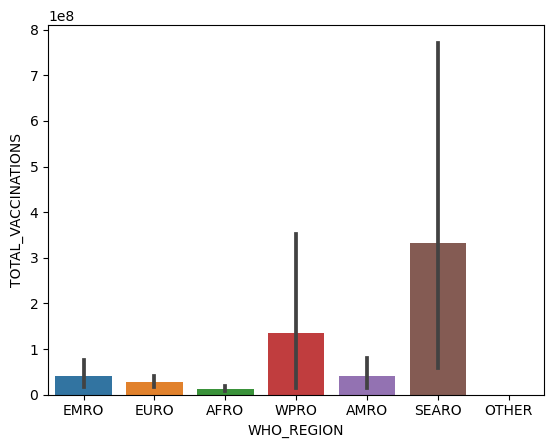

In [229]:
sns.barplot(data=vaccination_data, x = "WHO_REGION", y= "TOTAL_VACCINATIONS")
plt.show()

In [230]:
column_names = ["Country"]
duplicates = global_data.duplicated(subset=column_names, keep=False)

In [231]:
global_data[duplicates]

,Country,Cumulative_cases,Cumulative_deaths
Date_reported,,,
03/01/2020,Afghanistan,0,0
04/01/2020,Afghanistan,0,0
05/01/2020,Afghanistan,0,0
06/01/2020,Afghanistan,0,0
07/01/2020,Afghanistan,0,0
...,...,...,...
06/05/2023,Zimbabwe,264685,5686
07/05/2023,Zimbabwe,264685,5686
08/05/2023,Zimbabwe,264776,5689


In [232]:
global_data.drop_duplicates(subset="Country", inplace = True, keep = "last")

In [233]:
print(global_data.shape)
print(vaccination_data.shape)

(228, 3)
(228, 11)


In [234]:
print(global_data.head())

                      Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                     
10/05/2023        Afghanistan            217361               7902
10/05/2023            Albania            334090               3604
10/05/2023            Algeria            271751               6881
10/05/2023     American Samoa              8331                 34
10/05/2023            Andorra             48015                159


Merge DataFrames 

In [235]:
#Merge data and delete the unnessary data

Covid_19_data = vaccination_data.merge(global_data, how='outer', left_on=['COUNTRY'], right_on=['Country'])
Covid_19_data

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,Country,Cumulative_cases,Cumulative_deaths
0,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567.0,43.0,38.0,14076220.0,36.0,11.0,Afghanistan,217361.0,7902.0
1,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760.0,107.0,47.0,1277204.0,45.0,5.0,Albania,334090.0,3604.0
2,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131.0,35.0,18.0,6481186.0,15.0,4.0,Algeria,271751.0,6881.0
3,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206.0,208.0,84.0,42479.0,77.0,3.0,American Samoa,8331.0,34.0
4,AND,EURO,REPORTING,09/04/2023,157038.0,57910.0,203.0,76.0,53496.0,70.0,3.0,Andorra,48015.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,ZMB,AFRO,REPORTING,09/04/2023,13614983.0,11637730.0,74.0,63.0,9147920.0,50.0,3.0,Zambia,343911.0,4058.0
227,ZWE,AFRO,REPORTING,30/04/2023,13935112.0,7194886.0,94.0,48.0,5381080.0,36.0,4.0,Zimbabwe,264776.0,5689.0
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Curaçao,45812.0,302.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo[1],273872.0,3206.0


In [236]:
#Function for quick review of data
snapshot_data(Covid_19_data)

  ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  TOTAL_VACCINATIONS  \
0  AFG       EMRO   REPORTING   03/05/2023          16918550.0   
1  ALB       EURO   REPORTING   09/04/2023           3075848.0   
2  DZA       AFRO   REPORTING   04/09/2022          15267442.0   
3  ASM       WPRO   REPORTING   29/03/2023            114706.0   
4  AND       EURO   REPORTING   09/04/2023            157038.0   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                     14790567.0                       43.0   
1                      1347760.0                      107.0   
2                      7840131.0                       35.0   
3                        46206.0                      208.0   
4                        57910.0                      203.0   

   PERSONS_VACCINATED_1PLUS_DOSE_PER100  PERSONS_FULLY_VACCINATED  \
0                                  38.0                14076220.0   
1                                  47.0                 1277204.0   
2                

In [237]:
# MISSING VAUES

# Find the five percent threshold
threshold = len(Covid_19_data) * 0.05

# Create a filter
cols_2_drop = Covid_19_data.columns[Covid_19_data.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
Covid_19_data.dropna(subset=cols_2_drop, inplace=True)

print(Covid_19_data.isna().sum())


ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
NUMBER_VACCINES_TYPES_USED              0
Country                                 0
Cumulative_cases                        0
Cumulative_deaths                       0
dtype: int64


In [238]:
#Function to check datatypes    
check_types(Covid_19_data)

ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
NUMBER_VACCINES_TYPES_USED              float64
Country                                  object
Cumulative_cases                        float64
Cumulative_deaths                       float64
dtype: object


In [239]:
# Clean the new dataframe
Covid_19_data["Country"] = Covid_19_data["Country"].astype("category")
Covid_19_data["ISO3"] = Covid_19_data["ISO3"].astype("category")
Covid_19_data["DATA_SOURCE"] = Covid_19_data["DATA_SOURCE"].astype("category")
Covid_19_data["WHO_REGION"] = Covid_19_data["WHO_REGION"].astype("category")     
Covid_19_data["PERSONS_FULLY_VACCINATED"] = Covid_19_data["PERSONS_FULLY_VACCINATED"].astype("int")  
Covid_19_data["NUMBER_VACCINES_TYPES_USED"] = Covid_19_data["NUMBER_VACCINES_TYPES_USED"].astype("int") 
Covid_19_data["Cumulative_cases"] = Covid_19_data["Cumulative_cases"].astype("int") 
Covid_19_data["Cumulative_deaths"] = Covid_19_data["Cumulative_deaths"].astype("int") 
Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE"] = Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE"].astype("int") 
Covid_19_data["TOTAL_VACCINATIONS_PER100"] = Covid_19_data["TOTAL_VACCINATIONS_PER100"].astype("int") 
Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE_PER100"] = Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE_PER100"].astype("int") 
Covid_19_data["PERSONS_FULLY_VACCINATED_PER100"] = Covid_19_data["PERSONS_FULLY_VACCINATED_PER100"].astype("int")

In [240]:
Covid_19_data.head(20)

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,Country,Cumulative_cases,Cumulative_deaths
0,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567,43,38,14076220,36,11,Afghanistan,217361,7902
1,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760,107,47,1277204,45,5,Albania,334090,3604
2,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131,35,18,6481186,15,4,Algeria,271751,6881
3,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206,208,84,42479,77,3,American Samoa,8331,34
4,AND,EURO,REPORTING,09/04/2023,157038.0,57910,203,76,53496,70,3,Andorra,48015,159
5,AGO,AFRO,REPORTING,07/05/2023,25402678.0,15745756,77,48,8821410,27,1,Angola,105384,1934
6,AIA,AMRO,REPORTING,05/05/2023,24604.0,10854,164,72,10380,69,2,Anguilla,3904,12
7,ATG,AMRO,REPORTING,05/05/2023,136512.0,64290,139,66,62384,64,6,Antigua and Barbuda,9106,146
8,ARG,AMRO,REPORTING,07/10/2022,109652736.0,41324100,243,91,37840119,84,7,Argentina,10044957,130472
9,ARM,EURO,REPORTING,16/04/2023,2154067.0,1120934,73,38,995131,34,8,Armenia,449062,8747


In [241]:
Covid_19_data.shape

(220, 14)

In [242]:
Covid_19_data.dtypes

ISO3                                    category
WHO_REGION                              category
DATA_SOURCE                             category
DATE_UPDATED                              object
TOTAL_VACCINATIONS                       float64
PERSONS_VACCINATED_1PLUS_DOSE              int32
TOTAL_VACCINATIONS_PER100                  int32
PERSONS_VACCINATED_1PLUS_DOSE_PER100       int32
PERSONS_FULLY_VACCINATED                   int32
PERSONS_FULLY_VACCINATED_PER100            int32
NUMBER_VACCINES_TYPES_USED                 int32
Country                                 category
Cumulative_cases                           int32
Cumulative_deaths                          int32
dtype: object

In [243]:
# For consistency changing  all column names to uppercase
Covid_19_data.columns = Covid_19_data.columns.str.upper()
Covid_19_data["TOTAL_VACCINATIONS"] = Covid_19_data["TOTAL_VACCINATIONS"].astype("int") 

C:\Users\aoife\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [244]:
Covid_19_data.tail()

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,COUNTRY,CUMULATIVE_CASES,CUMULATIVE_DEATHS
223,VNM,WPRO,REPORTING,04/05/2023,266266588,90253541,274,93,85923905,88,6,Viet Nam,11575883,43196
224,WLF,WPRO,REPORTING,23/01/2023,17303,7150,154,64,6803,60,1,Wallis and Futuna,3427,7
225,YEM,EMRO,REPORTING,18/04/2023,1275368,1032545,4,3,788707,3,11,Yemen,11945,2159
226,ZMB,AFRO,REPORTING,09/04/2023,13614983,11637730,74,63,9147920,50,3,Zambia,343911,4058
227,ZWE,AFRO,REPORTING,30/04/2023,13935112,7194886,94,48,5381080,36,4,Zimbabwe,264776,5689


In [245]:
check_types(Covid_19_data)

ISO3                                    category
WHO_REGION                              category
DATA_SOURCE                             category
DATE_UPDATED                              object
TOTAL_VACCINATIONS                         int32
PERSONS_VACCINATED_1PLUS_DOSE              int32
TOTAL_VACCINATIONS_PER100                  int32
PERSONS_VACCINATED_1PLUS_DOSE_PER100       int32
PERSONS_FULLY_VACCINATED                   int32
PERSONS_FULLY_VACCINATED_PER100            int32
NUMBER_VACCINES_TYPES_USED                 int32
COUNTRY                                 category
CUMULATIVE_CASES                           int32
CUMULATIVE_DEATHS                          int32
dtype: object


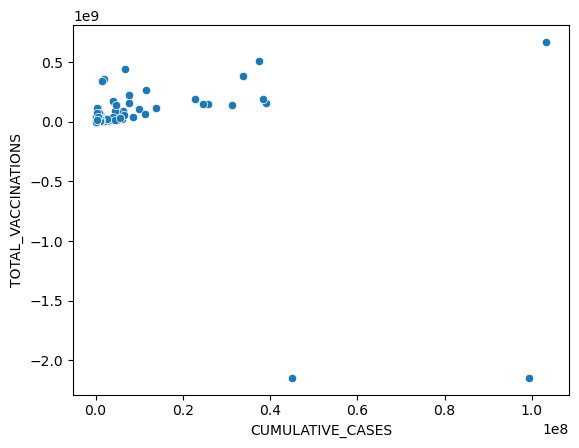

In [246]:
sns.scatterplot(data=Covid_19_data, x = "CUMULATIVE_CASES", y = "TOTAL_VACCINATIONS")
plt.show()

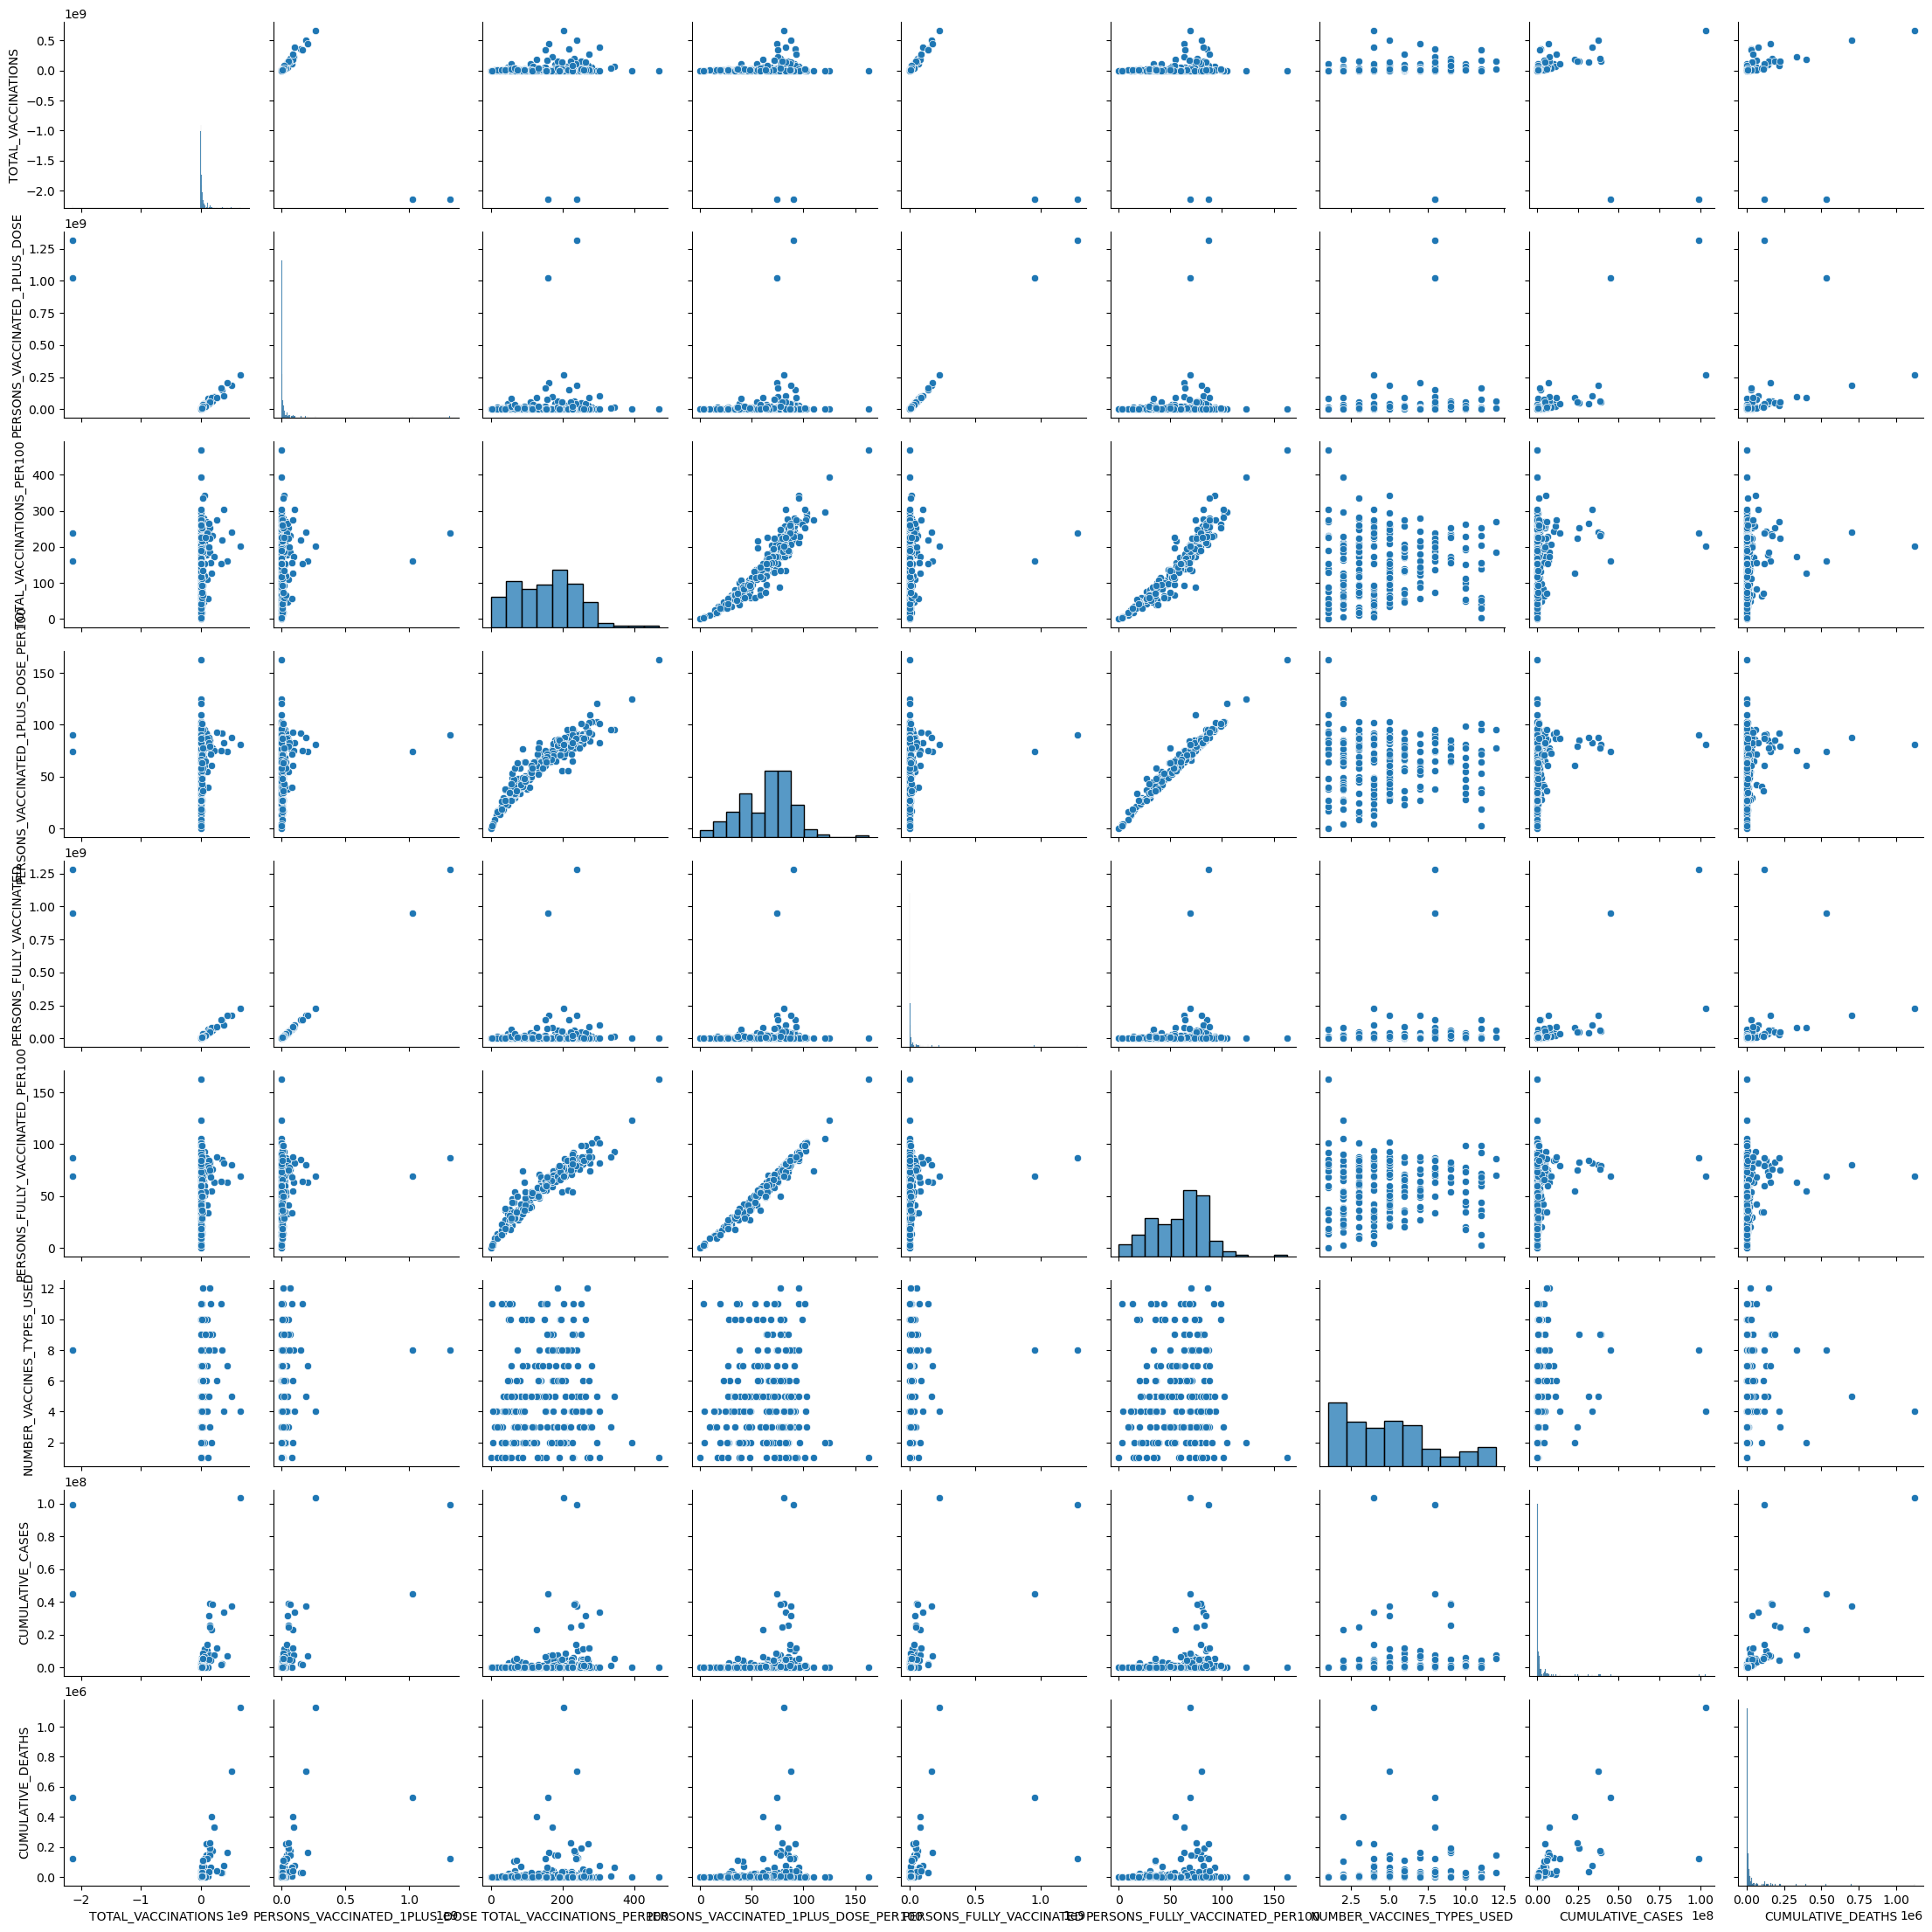

In [247]:
sns.pairplot(data=Covid_19_data)
plt.show()


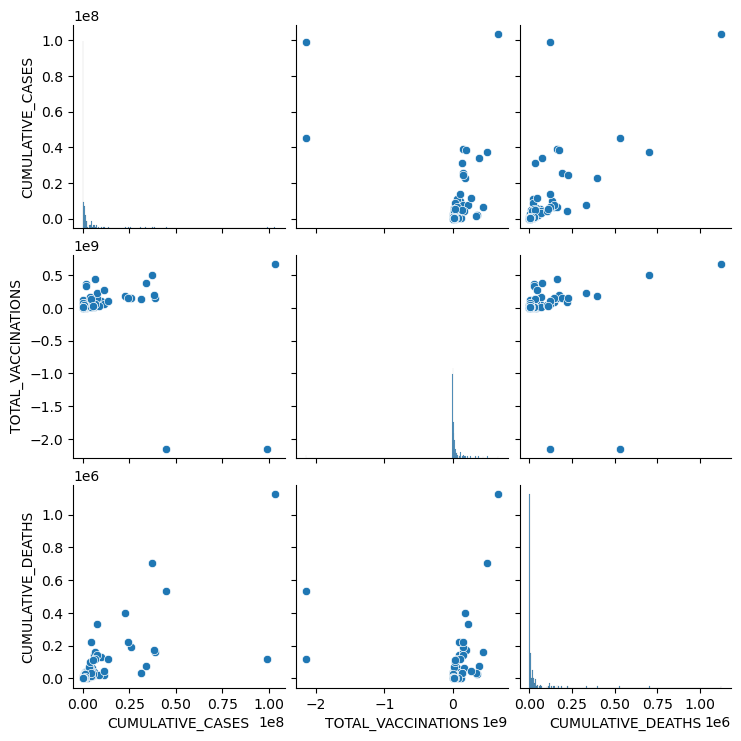

In [248]:
sns.pairplot(data=Covid_19_data, vars=["CUMULATIVE_CASES", "TOTAL_VACCINATIONS", "CUMULATIVE_DEATHS"])
plt.show()

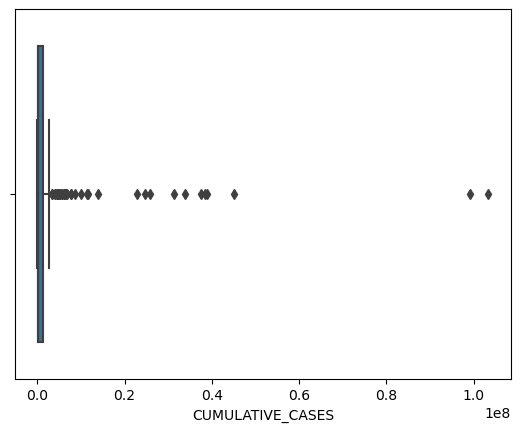

In [249]:
sns.boxplot(data=Covid_19_data, x ="CUMULATIVE_CASES")
plt.show()

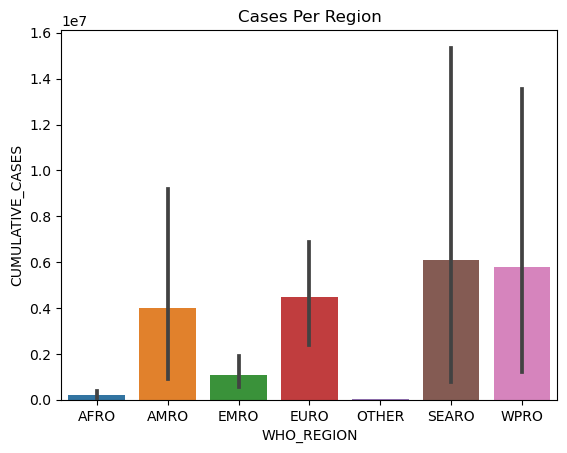

In [250]:
sns.barplot(data=Covid_19_data, x="WHO_REGION", y="CUMULATIVE_CASES")
plt.title("Cases Per Region")
plt.show()

In [251]:
plt.figure(num=None, figsize=(20,100), dpi=256, facecolor='w', edgecolor='r')
sns.barplot(data=Covid_19_data, x="CUMULATIVE_CASES", y="ISO3")
plt.title("Cumulative Cases Per Country")
plt.show()

In [252]:
#Create a list or Dictionary

In [253]:
Country_list = Covid_19_data["ISO3"].to_list()
print(Country_list)

['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MEX', 'FSM', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC'

In [254]:
WHO_Region_List = Covid_19_data["WHO_REGION"].to_list()
print(WHO_Region_List)

['EMRO', 'EURO', 'AFRO', 'WPRO', 'EURO', 'AFRO', 'AMRO', 'AMRO', 'AMRO', 'EURO', 'AMRO', 'WPRO', 'EURO', 'EURO', 'AMRO', 'EMRO', 'SEARO', 'AMRO', 'EURO', 'EURO', 'AMRO', 'AFRO', 'AMRO', 'SEARO', 'AMRO', 'EURO', 'AFRO', 'AMRO', 'AMRO', 'WPRO', 'EURO', 'AFRO', 'AFRO', 'AFRO', 'WPRO', 'AFRO', 'AMRO', 'AMRO', 'AFRO', 'AFRO', 'AMRO', 'WPRO', 'AMRO', 'AFRO', 'AFRO', 'WPRO', 'AMRO', 'AFRO', 'EURO', 'AMRO', 'EURO', 'EURO', 'AFRO', 'EURO', 'EMRO', 'AMRO', 'AMRO', 'AMRO', 'EMRO', 'AMRO', 'AFRO', 'EURO', 'AFRO', 'AFRO', 'AMRO', 'EURO', 'WPRO', 'EURO', 'EURO', 'AMRO', 'WPRO', 'AFRO', 'AFRO', 'EURO', 'EURO', 'AFRO', 'EURO', 'EURO', 'EURO', 'AMRO', 'AMRO', 'WPRO', 'AMRO', 'EURO', 'AFRO', 'AFRO', 'AMRO', 'AMRO', 'AMRO', 'EURO', 'EURO', 'SEARO', 'SEARO', 'EMRO', 'EMRO', 'EURO', 'EURO', 'EURO', 'EURO', 'AMRO', 'WPRO', 'EURO', 'EMRO', 'EURO', 'AFRO', 'WPRO', 'EMRO', 'EURO', 'WPRO', 'EURO', 'EMRO', 'AFRO', 'AFRO', 'EMRO', 'OTHER', 'EURO', 'EURO', 'AFRO', 'AFRO', 'WPRO', 'SEARO', 'AFRO', 'EURO', 'WPRO', '

In [255]:
# using zip() to convert lists to dictionary
WHO_Regions_Dict = dict(zip(Country_list, WHO_Region_List))
print(WHO_Regions_Dict)

{'AFG': 'EMRO', 'ALB': 'EURO', 'DZA': 'AFRO', 'ASM': 'WPRO', 'AND': 'EURO', 'AGO': 'AFRO', 'AIA': 'AMRO', 'ATG': 'AMRO', 'ARG': 'AMRO', 'ARM': 'EURO', 'ABW': 'AMRO', 'AUS': 'WPRO', 'AUT': 'EURO', 'AZE': 'EURO', 'BHS': 'AMRO', 'BHR': 'EMRO', 'BGD': 'SEARO', 'BRB': 'AMRO', 'BLR': 'EURO', 'BEL': 'EURO', 'BLZ': 'AMRO', 'BEN': 'AFRO', 'BMU': 'AMRO', 'BTN': 'SEARO', 'BOL': 'AMRO', 'BIH': 'EURO', 'BWA': 'AFRO', 'BRA': 'AMRO', 'VGB': 'AMRO', 'BRN': 'WPRO', 'BGR': 'EURO', 'BFA': 'AFRO', 'BDI': 'AFRO', 'CPV': 'AFRO', 'KHM': 'WPRO', 'CMR': 'AFRO', 'CAN': 'AMRO', 'CYM': 'AMRO', 'CAF': 'AFRO', 'TCD': 'AFRO', 'CHL': 'AMRO', 'CHN': 'WPRO', 'COL': 'AMRO', 'COM': 'AFRO', 'COG': 'AFRO', 'COK': 'WPRO', 'CRI': 'AMRO', 'CIV': 'AFRO', 'HRV': 'EURO', 'CUB': 'AMRO', 'CYP': 'EURO', 'CZE': 'EURO', 'COD': 'AFRO', 'DNK': 'EURO', 'DJI': 'EMRO', 'DMA': 'AMRO', 'DOM': 'AMRO', 'ECU': 'AMRO', 'EGY': 'EMRO', 'SLV': 'AMRO', 'GNQ': 'AFRO', 'EST': 'EURO', 'SWZ': 'AFRO', 'ETH': 'AFRO', 'FLK': 'AMRO', 'FRO': 'EURO', 'FJI': 

Machine Learning

from sklearn.model_selection import cross_val_score, Kfold
from sklearn.linear_model import LinearRegression
X = country_dummies.drop("AFG", axis=1).values
y = country_dummies("AFG").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = Kfold(n_splits=218, shuffle=True, random_state=42)

linreg =LinearRegression

linreg_cv = cross_validation_score(lin_reg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

print(np_sqrt(~linreg_cv)

Evaluating model

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Evaluating classification models
models = {"Logistic Regression": LogisticRegression(),
"KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#Test set performance

for name, model in models.items():
model.fit(X_train_scaled, y_train)test_score = model.score(X_test_scaled, y_test)
print("{} Test Set Accuracy: {}".format(name, test_score))

Cross Validation
KFold CV

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

Ridge Regression

from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)


Lasso Regression

from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X-test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

#Lasso for feature selection

from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

names= diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()
    


Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid ={"alpha": np.arrange(0.0001, 1, 10),
            "solver": ["sag", "lsqr"]}

test_score = ridge_cv.score(X_test, y_test)
print(test_score)


# Hyperparamaeter Tuning

# Grid Search CV

from sklearn.model_selection import GridSearchCV

kf = Kfold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np.arrange(0.0001, 1, 10),
            "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

Logistic Regression and the ROC Curve

from sklearn.linear_model import LinearRegression
logreg= LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], "k__")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("Logistic Regression ROC Curve")
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs)

Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighbors Classifier(n_neighbours=7)
X_train, X_test, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Kmeans clustering
from sklearn import KMeans
model = Kmeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)

print(new_samples)
new_labels = model.predict(new_samples)
print(new labels)

Scatterplot via Pyplot
import matplotlib.pyplot as plt
Xs = samples[:0]
ys = samples[:2]
plt.scatter(Xs, ys, c =labels)
plt.show()

Evaluating a cluster

#Crosstabulation with Pandas
df = pd.DataFrame({"labels": labels, "species": species})
ct = pd.crosstab(df["labels"], df["species"])
print(ct)

#Inertia
from sklearn.cluster import Kmeans
model = kmeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

#Transforming Data for Better Clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
df = pd.DataFrame({"labels": label,
                  "varieties": varietes})
ct = pd.crosstab(df["label"], df["varieties"])
print(ct)

#Use Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

# Pipelines combine multiple steps
from sklearn.preproceesing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = Kmeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

# Visualising Hierarchies
Each label begins in a different cluster. At each step, the two closest are merged. Continue until all are in a single cluster.

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method="complete")
dendrogram(mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

# Dendrogram shows cluster distance
#Height on Dendrogram = distance between merging clusters. It specifies max difference between merging clusters. 
#Don't merge clusters further apart than this.

# Extracing cluster labels
# fcluster() function returns a numpy array of cluster labels

from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method="complete")
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion="distance")
print(labels)


#Aligning cluster labels with country names
Given a list of strings country_names:
    import pandas as pd
    pairs pd.DataFrame({"labels": labels, "countries": country_names})
    print(pairs.sort_values('labels'))

    
#t-SNE for 2 dimensional mapping

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100) #Learning rate should be between 50 and 200
transformed = model.fit_transform(samples)
Xs= transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(Xs, ys, c=species)

# PCA = "Principal Component Analysis"
# PCA  aligns data with axes

samples = array of two features
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
print(transformed)

# Principal components is an attribute of PCA Object
print(model.components_)

#Intrinsic Dimension
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(Features)
plt.ylabel("Variance")
plt.xlabel("PCA Feature")
plt.show()

#Dimension Reduction with PCA
samples = arrat of measurements
species = list of species numbers
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)

import matplotlib.pyplot as plt
Xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(Xs, ys, c=species)
plt.show()

# initializing lists
test_keys = ["Rash", "Kil", "Varsha"]
test_values = [1, 4, 5]
 
# create a list of tuples using enumerate()
tuples = [(key, value)
          for i, (key, value) in enumerate(zip(test_keys, test_values))]
 
# convert list of tuples to dictionary using dict()
res = dict(tuples)
 
print(res)  # {'Rash': 1, 'Kil': 4, 'Varsha': 5}

In [256]:
print(Covid_19_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   ISO3                                  220 non-null    category
 1   WHO_REGION                            220 non-null    category
 2   DATA_SOURCE                           220 non-null    category
 3   DATE_UPDATED                          220 non-null    object  
 4   TOTAL_VACCINATIONS                    220 non-null    int32   
 5   PERSONS_VACCINATED_1PLUS_DOSE         220 non-null    int32   
 6   TOTAL_VACCINATIONS_PER100             220 non-null    int32   
 7   PERSONS_VACCINATED_1PLUS_DOSE_PER100  220 non-null    int32   
 8   PERSONS_FULLY_VACCINATED              220 non-null    int32   
 9   PERSONS_FULLY_VACCINATED_PER100       220 non-null    int32   
 10  NUMBER_VACCINES_TYPES_USED            220 non-null    int32   
 11  COUNTR

In [269]:
Covid_19_for_model = Covid_19_data.drop(['DATA_SOURCE', 'ISO3', 'DATE_UPDATED', 'WHO_REGION'], axis=1)
Covid_19_for_model

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,COUNTRY,CUMULATIVE_CASES,CUMULATIVE_DEATHS
0,16918550,14790567,43,38,14076220,36,11,Afghanistan,217361,7902
1,3075848,1347760,107,47,1277204,45,5,Albania,334090,3604
2,15267442,7840131,35,18,6481186,15,4,Algeria,271751,6881
3,114706,46206,208,84,42479,77,3,American Samoa,8331,34
4,157038,57910,203,76,53496,70,3,Andorra,48015,159
...,...,...,...,...,...,...,...,...,...,...
223,266266588,90253541,274,93,85923905,88,6,Viet Nam,11575883,43196
224,17303,7150,154,64,6803,60,1,Wallis and Futuna,3427,7
225,1275368,1032545,4,3,788707,3,11,Yemen,11945,2159
226,13614983,11637730,74,63,9147920,50,3,Zambia,343911,4058


In [270]:
Df_with_Dummies = pd.get_dummies(Covid_19_for_model, drop_first=True)
print(Df_with_Dummies.columns)

Index(['TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'NUMBER_VACCINES_TYPES_USED', 'CUMULATIVE_CASES', 'CUMULATIVE_DEATHS',
       'COUNTRY_Albania',
       ...
       'COUNTRY_United States of America', 'COUNTRY_Uruguay',
       'COUNTRY_Uzbekistan', 'COUNTRY_Vanuatu',
       'COUNTRY_Venezuela (Bolivarian Republic of)', 'COUNTRY_Viet Nam',
       'COUNTRY_Wallis and Futuna', 'COUNTRY_Yemen', 'COUNTRY_Zambia',
       'COUNTRY_Zimbabwe'],
      dtype='object', length=228)


In [280]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.linear_model import LinearRegression 

X = Df_with_Dummies.drop("TOTAL_VACCINATIONS", axis=1).values 

y = Df_with_Dummies["TOTAL_VACCINATIONS"].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

linreg =LinearRegression()

linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, 
                            scoring="neg_mean_squared_error")

print(np.sqrt(-linreg_cv))

[3.27639139e+07 4.51202238e+08 2.99782613e+07 1.61105617e+08
 5.76796608e+07 6.31120120e+07 6.36689644e+07 8.28965718e+08
 2.34747884e+08 2.75145731e+07]


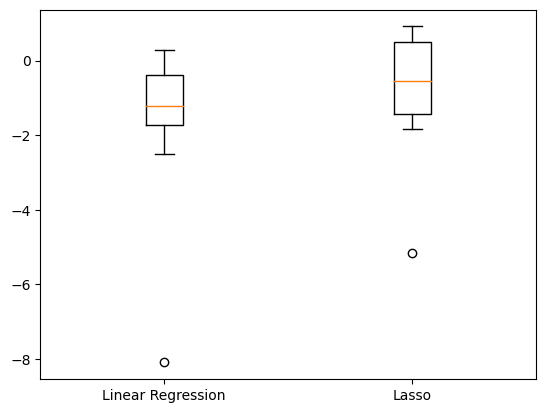

In [288]:
# Testing Different Models
from sklearn.linear_model import Lasso 
models = {"Linear Regression": LinearRegression(), "Lasso": Lasso(alpha=10.0)}
results = []

# Use a for loop
for model in models.values():
  kf = KFold(n_splits=10, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [292]:
# Create X and y
X = Df_with_Dummies["CUMULATIVE_CASES"].values
y = Df_with_Dummies["CUMULATIVE_DEATHS"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(220, 1) (220,)


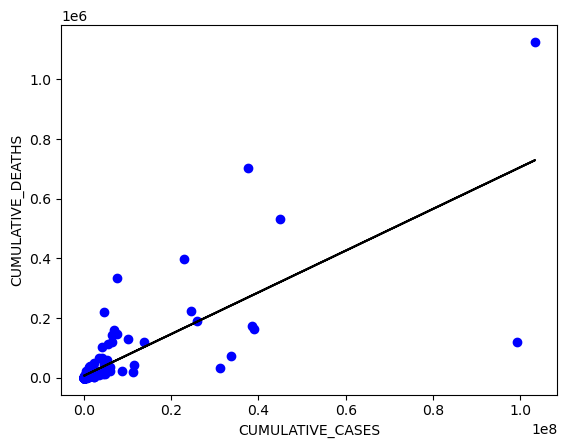

In [295]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="black")
plt.xlabel("CUMULATIVE_CASES")
plt.ylabel("CUMULATIVE_DEATHS")

# Display the plot
plt.show()

In [297]:
# Create X and y arrays
X_CASES = Df_with_Dummies.drop("CUMULATIVE_CASES", axis=1).values
y_DEATHS = Df_with_Dummies["CUMULATIVE_CASES"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [11361.30571844 18609.82640155], Actual Values: [   8 5435]


In [298]:
# R-squared
r_squared = reg.score(X_test, y_test)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Results
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.6416869874820824
RMSE: 105003.7407401583


In [ ]:
# Create a regex to check for negative values.

Regex = ^-\d+$

for row in 